In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
%matplotlib widget

# 如果上面出现错误，把widget 改为inline

In [4]:
data = load_iris()
data = pd.DataFrame(data=data.get('data'), columns=data.get('feature_names'))
data = data.iloc[:, :3]
data.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [5]:
class Stat3Dplot(object):
    def __init__(self, xdata):
        self.xdata = xdata
        if not isinstance(self.xdata, pd.DataFrame):
            raise ValueError("xdata 必须是一个 pd.DataFrame")

        self.xdata = self.xdata.select_dtypes(include=np.number)
        if self.xdata.shape[1] < 3:
            raise ValueError("data至少要有3列是数值型")

    def cal_fit_info(self, x, y):
        X = np.column_stack((x, x ** 2))
        X = sm.add_constant(X)

        res2 = sm.OLS(y, X).fit()
        adjust_R = res2.rsquared_adj

        new_x = np.linspace(x.min(), x.max())
        new_x_model = sm.add_constant(np.column_stack((new_x, new_x ** 2)))
        pred_y = res2.predict(new_x_model)

        # y = res2.get_prediction().summary_frame()
        return {'x': new_x, 'y': pred_y, 'adjr': adjust_R}

    def stat3dplot(self, fig):
        xdata = self.xdata
        # fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(projection='3d')

        # 3d scatter
        ax.scatter(xdata.iloc[:, 0], xdata.iloc[:, 1], xdata.iloc[:, 2], color='red')

        # add scatter to axis
        ax.scatter(xdata.iloc[:, 0], xdata.iloc[:, 1],
                   xdata.iloc[:, 2].min(), color='gray', alpha=0.5, s=3)
        ax.scatter(xdata.iloc[:, 0], xdata.iloc[:, 1].min(),
                   xdata.iloc[:, 2], color='gray', alpha=0.5, s=3)
        ax.scatter(xdata.iloc[:, 0].min(), xdata.iloc[:, 1],
                   xdata.iloc[:, 2], color='gray', alpha=0.5, s=3)

        # cal fit curve

        # x and y
        res1 = self.cal_fit_info(x=xdata.iloc[:, 0], y=xdata.iloc[:, 1])
        ax.plot(res1.get('x'), res1.get('y'), xdata.iloc[:, 2].min(), color='gray')
        ax.text(xdata.iloc[:, 0].mean(), xdata.iloc[:, 1].mean(), xdata.iloc[:, 2].min(),
                f"R-square: {res1.get('adjr'):.3f}", (0, 1, 1))

        # x and z
        res1 = self.cal_fit_info(x=xdata.iloc[:, 0], y=xdata.iloc[:, 2])
        ax.plot(res1.get('x'), np.ones_like(res1.get('x')) *
                xdata.iloc[:, 1].min(), res1.get('y'), color='gray')
        ax.text(xdata.iloc[:, 0].mean(), xdata.iloc[:, 1].min(), xdata.iloc[:, 2].mean(),
                f"R-square: {res1.get('adjr'):.3f}", (0, 1, 1))

        # y and z
        res1 = self.cal_fit_info(x=xdata.iloc[:, 1], y=xdata.iloc[:, 2])
        ax.plot(np.ones_like(res1.get('x')) *
                xdata.iloc[:, 0].min(), res1.get('x'), res1.get('y'), color='gray')
        ax.text(xdata.iloc[:, 0].mean(), xdata.iloc[:, 1].mean(), xdata.iloc[:, 2].min(),
                f"R-square: {res1.get('adjr'):.3f}", (0, 1, 1))
        ax.text(xdata.iloc[:, 0].min(), xdata.iloc[:, 1].mean(), xdata.iloc[:, 2].mean(),
                f"R-square: {res1.get('adjr'):.3f}", (0, 1, 1))

        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False

        ax.xaxis.pane.set_edgecolor('black')
        ax.yaxis.pane.set_edgecolor('black')
        ax.zaxis.pane.set_edgecolor('black')

        ax.set_xlabel(xdata.columns.tolist()[0])
        ax.set_ylabel(xdata.columns.tolist()[1])
        ax.set_zlabel(xdata.columns.tolist()[2])
        ax.view_init(elev=30., azim=40)
        return ax

## demo 1

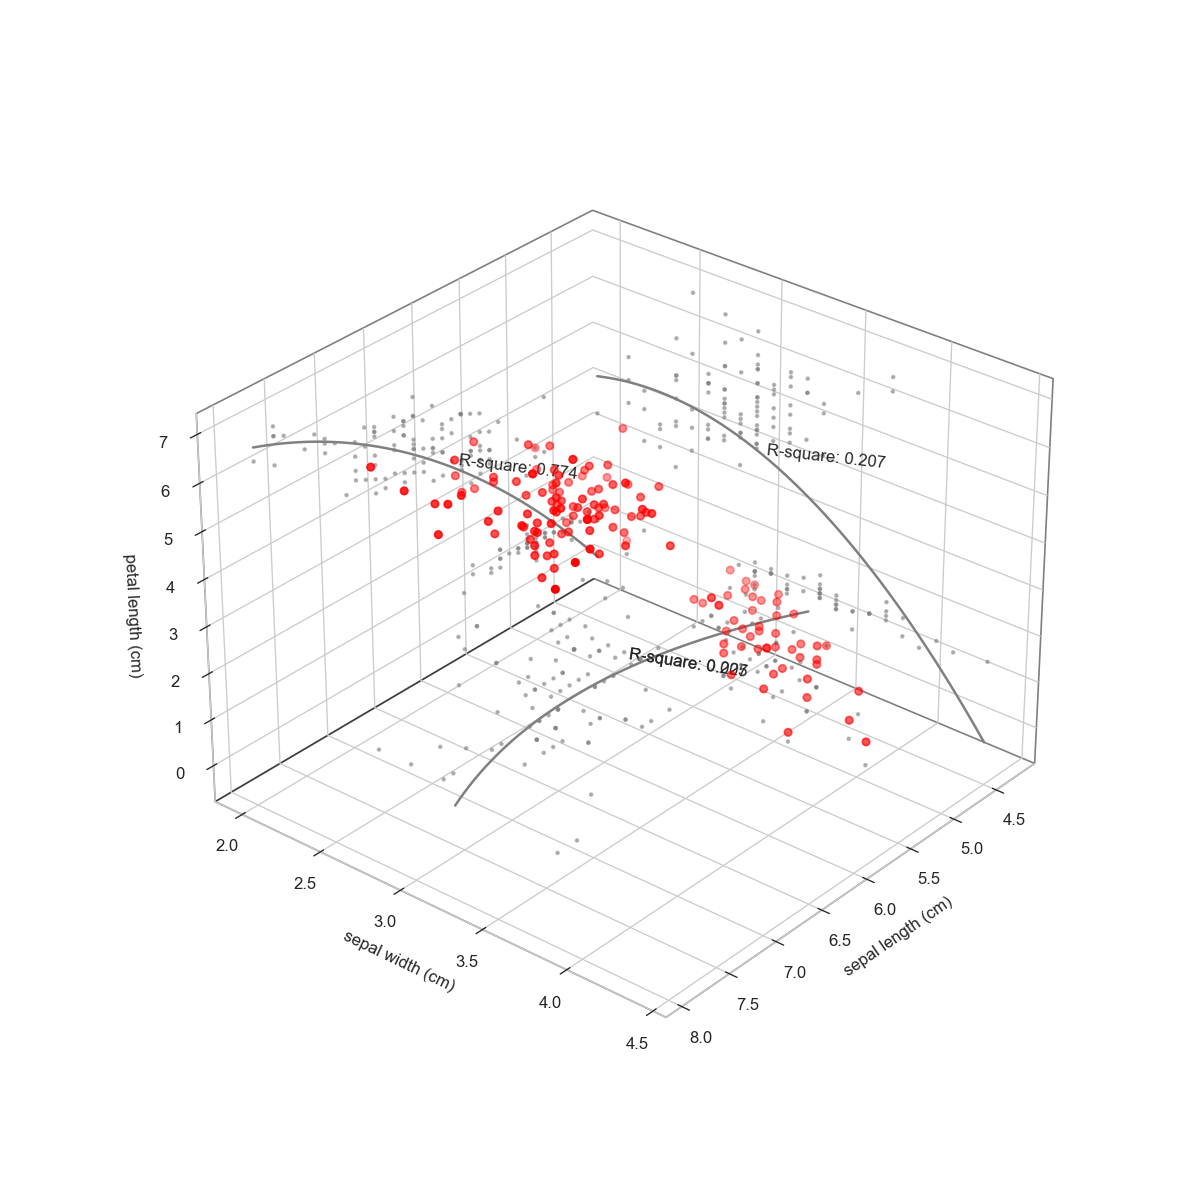

In [7]:
# 01: 创建画布
fig = plt.figure(figsize=(10, 10), dpi=120)

# 02: 创建一个3d统计对象，把自己的数据传递进去
s3d = Stat3Dplot(xdata=data)

# 03: 开始画图
ax = s3d.stat3dplot(fig=fig)

# 04: 保存
fig.savefig("data001.png")